<h1>NBA Shooting Analysis</h1>

In [32]:
#Importing Libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.cluster import KMeans
import requests
from nba_api.stats import endpoints
from matplotlib import pyplot as plt

from nba_api.stats.static import teams,players
teams=teams.get_teams()
nba_players = players.get_players()

from nba_api.stats.library.parameters import SeasonAll
import matplotlib as mpl
import json
import requests

In [33]:
pd.DataFrame(teams)

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966
5,1610612742,Dallas Mavericks,DAL,Mavericks,Dallas,Texas,1980
6,1610612743,Denver Nuggets,DEN,Nuggets,Denver,Colorado,1976
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946
8,1610612745,Houston Rockets,HOU,Rockets,Houston,Texas,1967
9,1610612746,Los Angeles Clippers,LAC,Clippers,Los Angeles,California,1970


<h1>Analysing Relationship between PPG and FG% of players for shooting analysis</h1>

In [34]:
#Getting the league leaders of current season
data = endpoints.leagueleaders.LeagueLeaders(season='2018-19') 
df = data.league_leaders.get_data_frame()

df

,PLAYER_ID,RANK,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
0,201935,1,James Harden,HOU,78,2867,843,1909,0.442,378,...,518,586,158,58,387,244,2818,2581,1.51,0.41
1,202331,2,Paul George,OKC,77,2841,707,1614,0.438,292,...,628,318,170,34,205,214,2159,2110,1.55,0.83
2,202689,3,Kemba Walker,CHA,82,2863,731,1684,0.434,260,...,361,484,102,34,211,131,2102,1849,2.29,0.48
3,203078,4,Bradley Beal,WAS,82,3028,764,1609,0.475,209,...,411,448,121,58,224,226,2099,1982,2.00,0.54
4,203081,5,Damian Lillard,POR,80,2838,681,1533,0.444,237,...,371,551,88,34,212,148,2067,2002,2.60,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,1628424,521,Kobi Simmons,CLE,1,2,0,0,0.000,0,...,0,0,0,0,0,0,0,0,0.00,0.00
526,1627855,521,Okaro White,WAS,3,6,0,2,0.000,0,...,2,0,0,0,0,0,0,0,0.00,0.00
527,1629093,521,Tyler Davis,OKC,1,1,0,1,0.000,0,...,1,0,0,0,0,0,0,0,0.00,0.00
528,1627755,521,Tyler Ulis,CHI,1,1,0,0,0.000,0,...,0,0,0,0,0,0,0,0,0.00,0.00


In [35]:
#Getting PPG(Points per game) and FGA (Field Goal Attempts)
x, y = df.FGA/df.GP, df.PTS/df.GP 

x = np.array(x).reshape(-1,1) 
y = np.array(y).reshape(-1,1) 

In [36]:
#Using data in Linear Regression Model
model = linear_model.LinearRegression()   
model.fit(x,y)                          

r2 = round(model.score(x,y), 2)           
predicted_y = model.predict(x)

Text([14.53658537], [24.63414634], 'Kemba Walker')

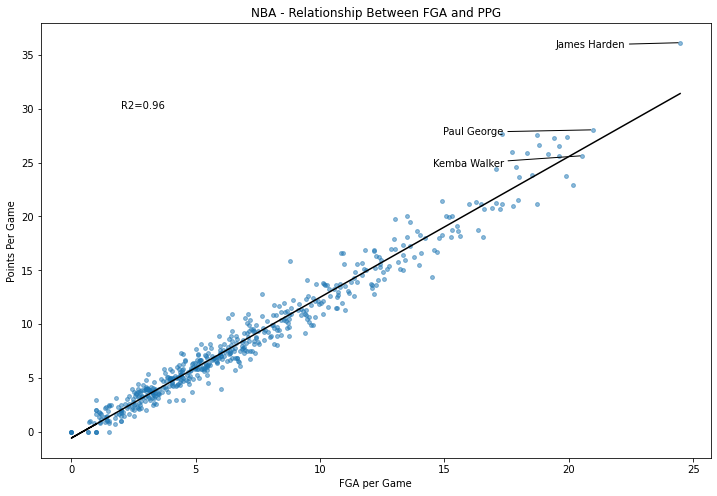

In [37]:
#Plotting PPG Vs FGA 
#Also marking top 3 players with highest number of points
plt.figure(figsize=(12,8))
plt.scatter(x, y, s=15, alpha=.5)                           
plt.plot(x, predicted_y, color = 'black')                   
plt.title('NBA - Relationship Between FGA and PPG')         
plt.xlabel('FGA per Game')                                  
plt.ylabel('Points Per Game')                                
plt.text(2,30, f'R2={r2}')                                  


plt.annotate(df.PLAYER[0],                       
             (x[0], y[0]),                         
             (x[0]-5,y[0]-0.5),                    
             arrowprops=dict(arrowstyle='-'))

plt.annotate(df.PLAYER[1],                       
             (x[1], y[1]),                         
             (x[1]-6,y[1]-0.5),                    
             arrowprops=dict(arrowstyle='-'))

plt.annotate(df.PLAYER[2],                       
             (x[2], y[2]),                         
             (x[2]-6,y[2]-1),                    
             arrowprops=dict(arrowstyle='-'))

We can see that,Elite Players with High efficiency are allowed to take more shooting attempts and hence result to higher points scored per game.

<h1>Making a Shot Chart for individual shooting analysis</h1>

In [38]:
#Getting Team ID
team_id= [team_id for team_id in teams
         if team_id['full_name'] == 'Golden State Warriors'][0]['id']
team_id

1610612744

In [39]:
#Getting Player ID
player_id= [player_id for player_id in nba_players
         if player_id['full_name'] == 'Stephen Curry'][0]['id']
player_id

201939

In [40]:
from nba_api.stats.endpoints import shotchartdetail

# Create JSON request for Stephen Curry *My favourite Player* shot Chart Details
shot_json = shotchartdetail.ShotChartDetail(
            team_id=1610612744,
            player_id = 201939,
            context_measure_simple = 'PTS',
            season_nullable = '2018-19',
            season_type_all_star = 'Regular Season')

In [41]:
shot_data = json.loads(shot_json.get_json())

# Get the relevant data from our dictionary
relevant_data = shot_data['resultSets'][0]

# Get the headers and row data
headers = relevant_data['headers']
rows = relevant_data['rowSet']

In [42]:
# Create pandas DataFrame
player_data = pd.DataFrame(rows)
player_data.columns = headers
player_data

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021800002,10,201939,Stephen Curry,1610612744,Golden State Warriors,1,11,31,...,Right Side Center(RC),24+ ft.,24,226,90,1,1,20181016,GSW,OKC
1,Shot Chart Detail,0021800002,58,201939,Stephen Curry,1610612744,Golden State Warriors,1,7,57,...,Center(C),Less Than 8 ft.,6,-2,63,1,1,20181016,GSW,OKC
2,Shot Chart Detail,0021800002,131,201939,Stephen Curry,1610612744,Golden State Warriors,1,3,46,...,Center(C),Less Than 8 ft.,2,5,29,1,1,20181016,GSW,OKC
3,Shot Chart Detail,0021800002,145,201939,Stephen Curry,1610612744,Golden State Warriors,1,2,49,...,Left Side(L),24+ ft.,22,-228,8,1,1,20181016,GSW,OKC
4,Shot Chart Detail,0021800002,293,201939,Stephen Curry,1610612744,Golden State Warriors,2,6,5,...,Left Side Center(LC),24+ ft.,28,-204,195,1,1,20181016,GSW,OKC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,Shot Chart Detail,0021801205,325,201939,Stephen Curry,1610612744,Golden State Warriors,2,0,39,...,Center(C),8-16 ft.,8,33,78,1,1,20190407,GSW,LAC
628,Shot Chart Detail,0021801205,503,201939,Stephen Curry,1610612744,Golden State Warriors,3,1,31,...,Center(C),Less Than 8 ft.,1,6,13,1,1,20190407,GSW,LAC
629,Shot Chart Detail,0021801205,533,201939,Stephen Curry,1610612744,Golden State Warriors,3,0,3,...,Left Side Center(LC),24+ ft.,30,-201,224,1,1,20190407,GSW,LAC
630,Shot Chart Detail,0021801215,48,201939,Stephen Curry,1610612744,Golden State Warriors,1,8,1,...,Center(C),24+ ft.,26,73,255,1,1,20190409,NOP,GSW


In [43]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

In [44]:
playerkmeans=player_data[['LOC_X','LOC_Y']]
km_res=KMeans(n_clusters=5).fit(playerkmeans)
y_kmeans = km_res.predict(playerkmeans)


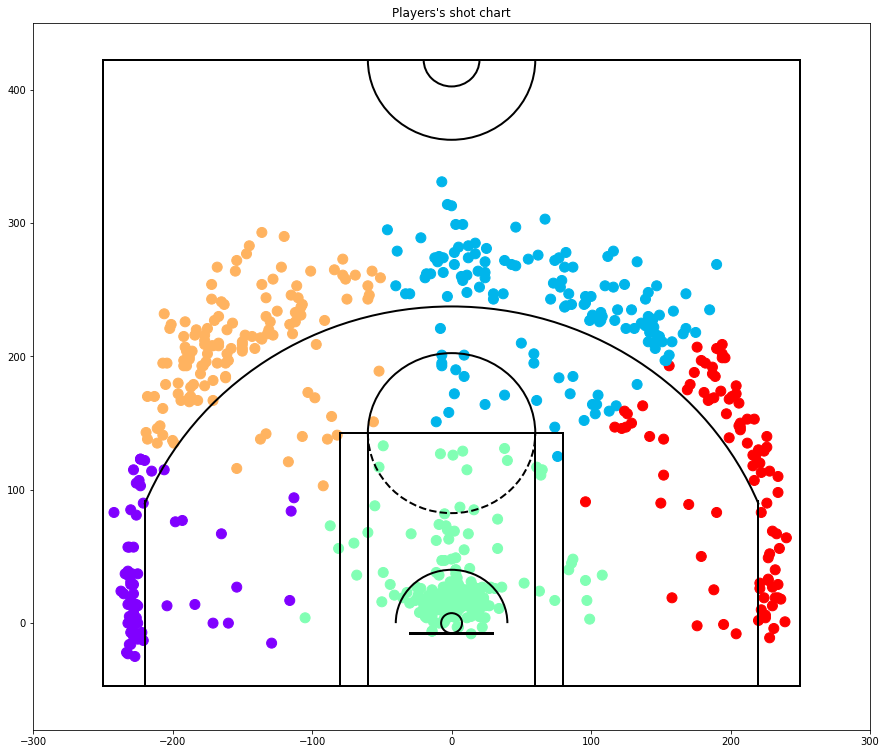

In [45]:
fig = plt.figure(figsize=(15,13))
plt.scatter(data=playerkmeans,x='LOC_X',y='LOC_Y',c=y_kmeans,s=100,cmap='rainbow')
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-80,450)

plt.title("Players's shot chart")
plt.show()